# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/Data/yulu_rental.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [5]:
df.shape

(10886, 19)

In [6]:
total_bytes = df.memory_usage().sum()
total_megabytes = total_bytes / (1024 * 1024)
print(f"{total_megabytes:.2f}")

1.42


In [8]:
df['date'] = pd.to_datetime(df['date'])

print('Мінімальна дата:', df['date'].min())
print('Максимальна дата:', df['date'].max())

Мінімальна дата: 2011-01-01 00:00:00
Максимальна дата: 2012-12-19 00:00:00


In [9]:
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


Набір даних містить 10 886 рядків та 19 стовпців, його обсяг становить приблизно 1.42 МБ.
Дані охоплюють період з 01.01.2011 по 19.12.2012.
Рівень деталізації - погодинний, тобто один рядок відповідає одній годині спостереження.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [11]:
daily_rents = df.groupby('date')['count'].sum()

<Axes: title={'center': 'Динаміка оренди велосипедів'}, xlabel='date'>

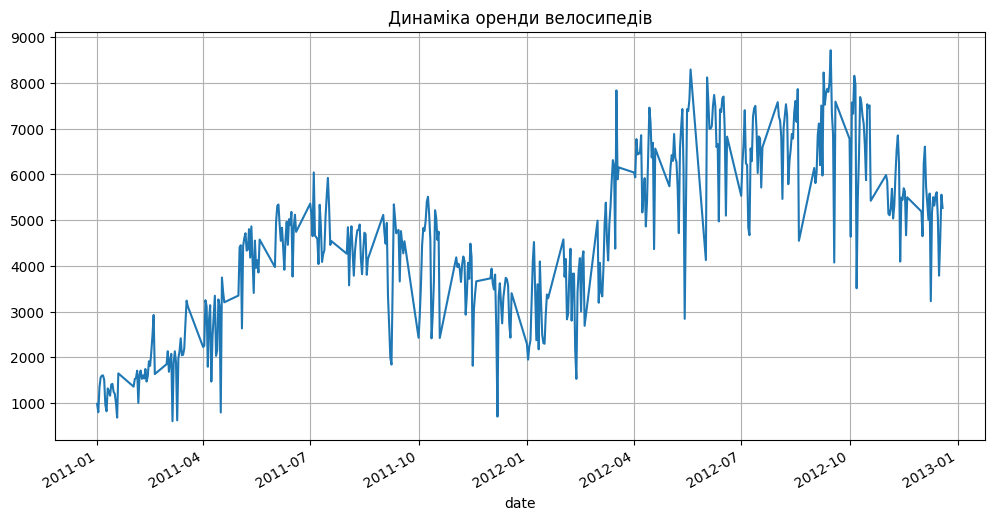

In [124]:
daily_rents.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    grid=True
)

1. Чому графік має "заломи"?

Дані агреговані поденно, але попит на велосипеди сильно залежить від: погоди, дня тижня (будні vs вихідні),свят.

Як прибрати заломи?

Можна використати метод resample(). Це допоможе нам загрегувати дані помісячно, за роками, тощо.

2. Загальні тенденції

У 2012 році оренд більше, ніж у 2011. Це може свідчити про зростання популярності сервісу.

3. Чи є сезонність?

Так, сезонність добре помітна. З середини весни почитається зростання кількість орендованих велосипедів. Ця тенденція триває до середини осені, після чого бачимо спад. Логічно, що хороша погода сприяє збільшенню попиту.

4. Чи є аномалії?

Так, бачимо як різкі спади, що може бути пов'язано з поганою погодою, святами, так і різкі підйоми, хоч і менш різкі, що також може бути пов'язано вже з хорошою погодою, або, наприклад вихідними.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

In [37]:
quarter_rents = df.groupby('season')['count'].mean()
quater_rents

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


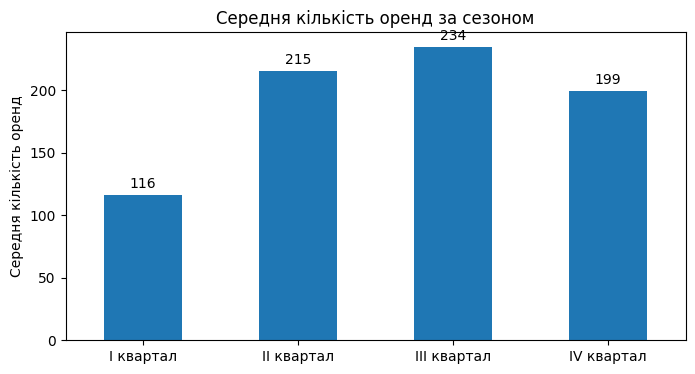

In [104]:
ax = quarter_rents.plot.bar(
    figsize=(8, 4),
    title='Середня кількість оренд за сезоном',
    xlabel='',
    ylabel='Середня кількість оренд'
)

plt.xticks(rotation=0)
ax.set_xticklabels(['I квартал', 'II квартал','III квартал','IV квартал'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.show()

1. В який квартал найбільша середня кількість оренди велосипедів?

Найбільша середня кількість оренд спостерігається у III кварталі. Найменша - у I кварталі.

2. Як ви можете пояснити таку сезонну закономірність?

Влітку та навесні погодні умови є найбільш сприятливими для користування велосипедами. Натомість взимку низькі температури та несприятливі погодні умови знижують попит. Таким чином, сезонність пов’язана з погодними факторами.

3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталами?

Співвідношення становить 234 / 116 = 2,02.
Отже, у 3 кварталі оренда приблизно у 2 рази вища, ніж у 1 кварталі.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [71]:
monthly_rents = df.groupby('month')['count'].mean()

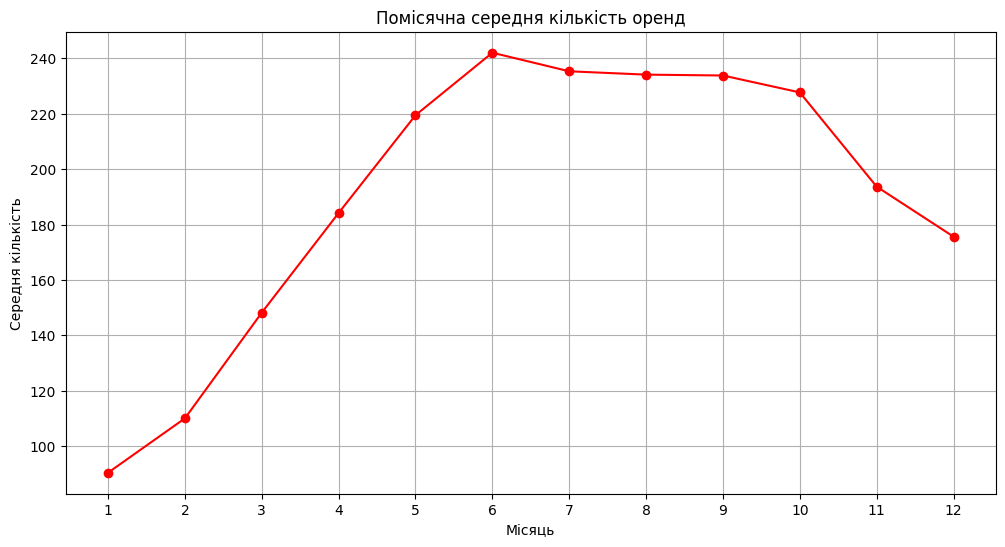

In [76]:
monthly_rents.plot (
    figsize=(12, 6),
    xlabel='Місяць',
    ylabel='Середня кількість',
    marker='o',
    color='red',
    grid=True,
    title='Помісячна середня кількість оренд'
)

plt.xticks(range(1,13))

plt.show()

1. В які місяці спостерігається пік та спад оренди?

Найвищі середні значення оренди спостерігаються у червні. Також високий рівень зберігається у липні, серпні та вересні.
Найнижчі показники фіксуються у січні, а також у листопаді та грудні.

2. Чи збігається ця закономірність з результатами з попереднього завдання?

Закономірність повністю збігається з результатами аналізу за кварталами. У літній період оренда є найвищою, тоді як у зимовий найнижчою. Це підтверджує наявність сезонних коливань.

3. Як може вплинути клімат на оренду велосипедів протягом року?

Клімат суттєво впливає на рівень оренди. У теплі місяці хороші погодні умови стимулюють використання велосипедів, також це час відпусток для багатьох. У холодний період, особливо взимку, низькі температури, опади знижують попит.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

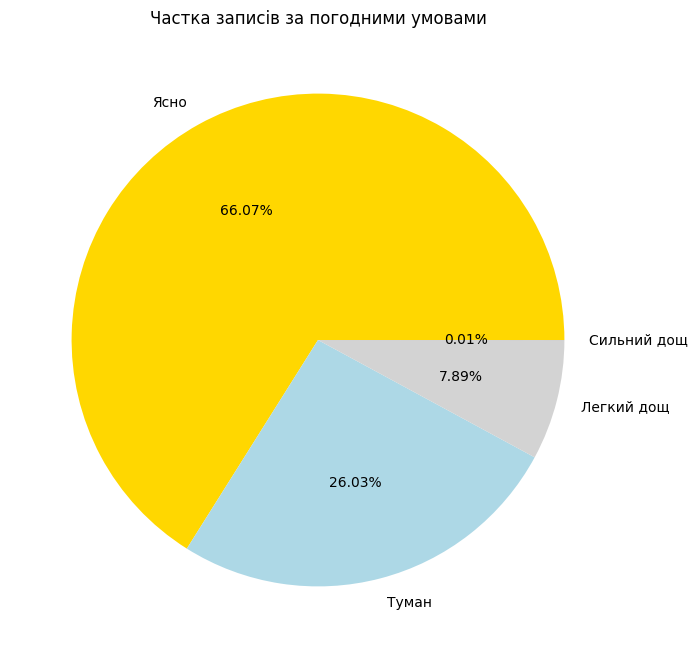

In [80]:
weather_impact = df['weather'].value_counts()
weather_impact

,count
weather,
1,7192
2,2834
3,859
4,1


<Axes: title={'center': 'Частка записів за погодними умовами'}>

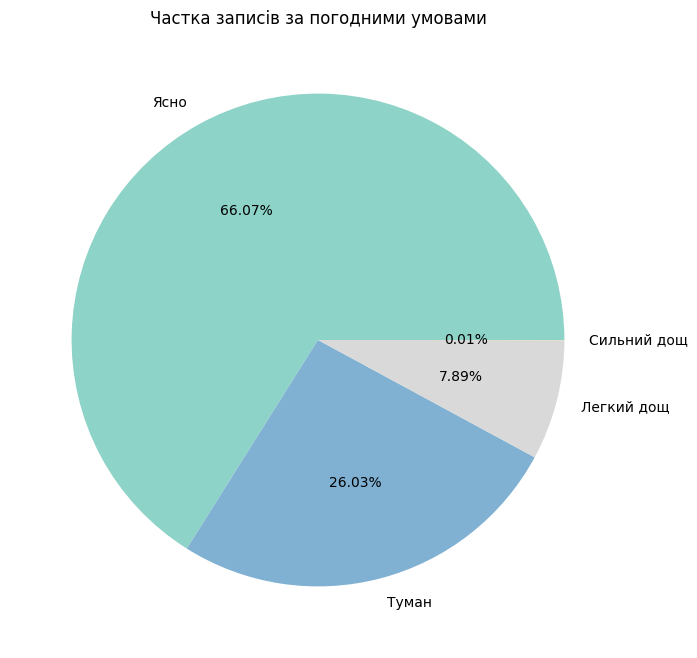

In [142]:
weather_impact.plot.pie(
    figsize=(8, 8),
    autopct='%1.2f%%',
    labels=['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'],
    title='Частка записів за погодними умовами',
    ylabel='',
    colormap='Set3'
)

1. Яка погода переважає в датасеті?

У датасеті переважає ясна погода. Її частка становить приблизно 66% від усіх записів, тому більша кількість оренд припадає на сприятливі погодні умови.

2. Чи є дні із сильним дощем? Яка їх частка?

Частка записів із сильним дощем становить близько 0,01%, тобто такі погодні умови майже не представлені в даних. Це може означати, що в дні із сильними опадами оренда практично не здійснюється.

3. Як погодні умови впливають на попит на оренду велосипедів?

Погодні умови суттєво впливають на попит. За ясної погоди оренда є значно вищою, тоді як під час дощу чи інших несприятливих умов кількість оренд зменшується.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [107]:
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

df['weather_name'] = df['weather'].map(weather_labels)

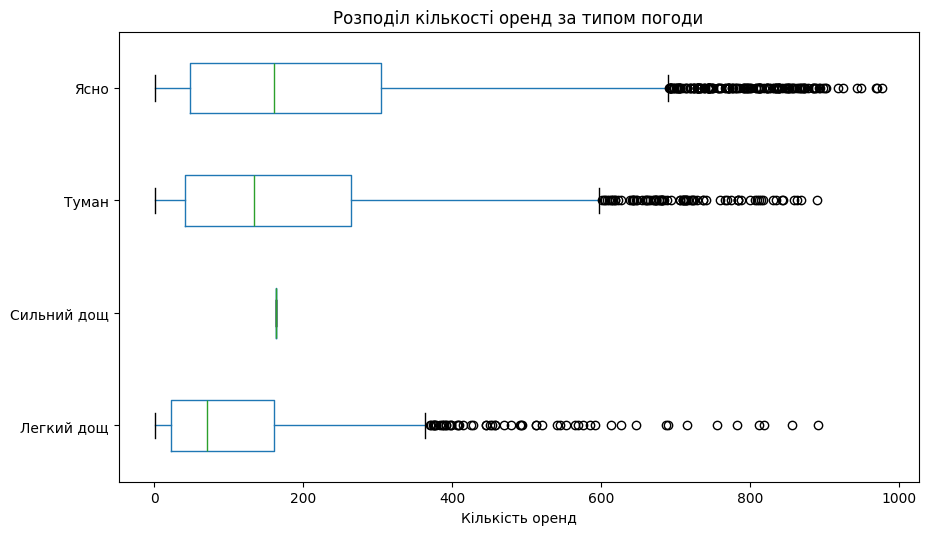

In [118]:
df.boxplot(
    column='count',
    by='weather_name',
    figsize=(10, 6),
    grid = False,
    vert = False
)
plt.title('Розподіл кількості оренд за типом погоди')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('')
plt.show()

1. При якій погоді найбільший розкид у кількості оренди?

Найбільший розкид у кількості оренди спостерігається за ясної погоди. Значення варіюються у широкому діапазоні, що видно по довжині вусів та ширині коробки.

2. Чи є викиди (outliers) в даних? При якій погоді?

Так, викиди присутні. Найбільше їх за ясної погоди та при тумані. При легкому дощі вони також є, але у меншій кількості. При сильному дощі викидів майже немає через малу кількість спостережень, тобто низьку кількість оренд.

3. При якій погоді медіанне значення оренди найвище?

Найвище медіанне значення оренди спостерігається за ясної погоди, що свідчить про найбільший типовий рівень попиту в сприятливих погодних умовах.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

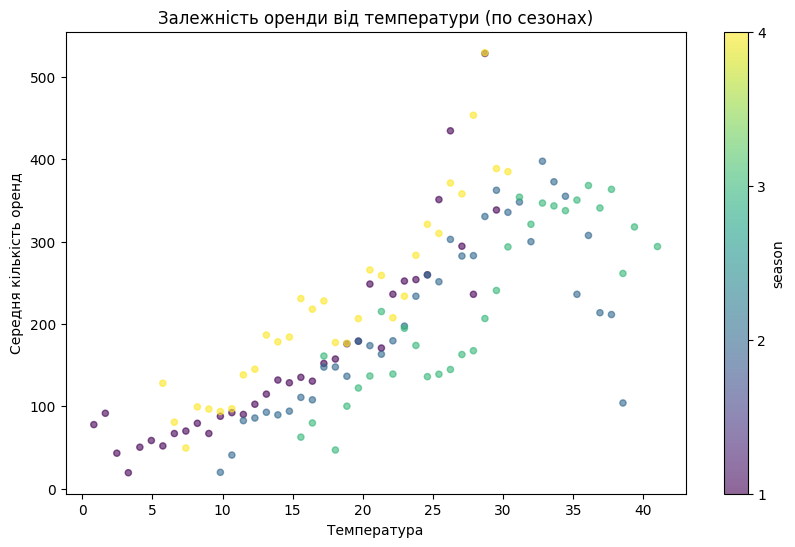

In [144]:
grouped_avg_rentals = df.groupby(['temp', 'season'])['count'].mean().reset_index()



ax = grouped_avg_rentals.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    alpha=0.6,
    figsize=(10, 6),
    title='Залежність оренди від температури (по сезонах)'
)

ax.set_xlabel('Температура')
ax.set_ylabel('Середня кількість оренд')
cbar = ax.figure.axes[-1]
cbar.set_yticks([1, 2, 3, 4])

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

/tmp/ipython-input-104363739.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = df.groupby('weekday')[['casual', 'registered']].mean()


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

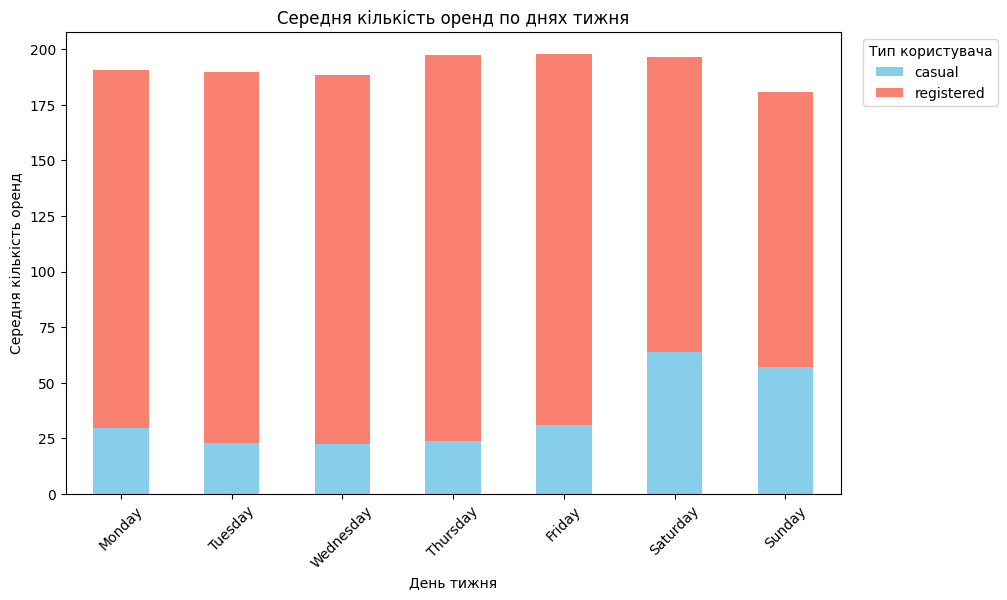

In [158]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['weekday'] = pd.Categorical(df['weekday'], categories=ordered_days, ordered=True)

weekday_avg = df.groupby('weekday')[['casual', 'registered']].mean()

weekday_avg.plot.bar(
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon']
)

plt.legend(
    title='Тип користувача',
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.title('Середня кількість оренд по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=45)

1. В які дні тижня більше оренд від зареєстрованих користувачів?

Найбільше оренд від зареєстрованих користувачів припадає на будні дні У вихідні дні, тобто в суботу та неділю, кількість оренд від зареєстрованих користувачів зменшується.

2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

Зареєстровані користувачі, ймовірно, використовують велосипеди для постійних поїздок на роботу або навчання, тому в будні дні попит вищий. У вихідні робочі поїздки скорочуються, і велосипеди частіше беруть для відпочинку чи прогулянок, що збільшує частку casual користувачів.